## 一、安裝 [OpenCV](https://blog.roboflow.com/m1-opencv/)
1. Installing Homebrew
    - /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
2. Install miniforge using Homebrew
    - brew install miniforge
    - conda init zsh
3. Set up a new virtual environment called cv with python 3.8.6.
    - conda create -n cv python=3.8.6
    - conda activate cv
4. Install OpenCV
    - conda install -c conda-forge opencv

## 二、載入及儲存影像
OpenCV 在載入圖片時可以選擇以下三種方式：
- cv2.IMREAD_COLOR (預設值)，載入包含 BGR 三個 channel 的彩色圖片
- cv2.IMREAD_GRAYSCALE, 載入灰階格式的圖片
- cv2.IMREAD_UNCHANGED, 載入圖片中的所有 channel，主要是針對 RGBA 等格式

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('cat.jpeg')            # 讀取圖片，返回一個多維陣列
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # 轉換色彩空間。預設讀進來的圖片色彩空間都是 BGR
print(img.shape)                        # (高, 寬, 通道數)
print(img[0, 0])                        # 第 (0, 0) 個 pixel 的 BGR 顏色
cv2.imwrite('1.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 80])      # 儲存圖片。jpg 可調整壓縮率，加在設定參數上
plt.imshow(img)                         # 顯示圖片
plt.xticks([]), plt.yticks([])

In [ ]:
# 儲存成圖片
cv2.imwrite('test.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 8])

In [ ]:
# 儲存成影片
video = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (500, 400))  # 建立儲存控制變數
for i in range(500):
    img = np.full((400, 500, 3), (100, 199, 250), np.uint8)
    img = Image.fromarray(img)
    ImageDraw.Draw(img).text((i, 200), '哈哈', (255,0,0), ImageFont.truetype('kaiu.ttf', 50))
    img = np.array(img)
    video.write(img)   # 寫入影片影格
video.release()        # 釋放控制變數

In [ ]:
# 影片讀取
cap = cv2.VideoCapture('test.mp4')   # 取得影像來源
cap.set(1, 250)             # 設定來源資訊
while cap.isOpened():       # 判斷影像來源是否有開啟
    ret, img = cap.read()
    if ret:                # 判斷是否有讀到畫面
        cv2_imshow(img)    # img 為讀到的畫面(圖像)變數
    else:
        break
        
# cap.get(5)       # 取得來源資訊

In [ ]:
# 錄影
cap = cv2.VideoCapture(0)   # 取得影像來源
video = cv2.VideoWriter('record.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (640, 480))  # 建立儲存控制變數
while cap.isOpened():       # 判斷影像來源是否有開啟
    ret, img = cap.read()
    if ret:                 # 判斷是否有讀到畫面
        video.write(img)    # 寫入影片影格
    else:
        break
video.release()             # 釋放控制變數

## 三、色彩空間 Color Space
### (1) 灰階
早期沒有彩色顯示器時，人們使用灰階(也就是黑白照片)的方式來表示一張圖片，使用 8 bit 來表示每一個像素值，值介於 0～255 之間

### (2) RGB
影像處理中最常見的顏色表示法，光學三原色的概念，將顏色設想成三維空間上的一個點，x-y-z 軸分別代表 R-G-B 三種顏色的值，並且限定在 0～255 之間

### (3) HSB(=HSV)
符合人類對顏色的直觀感受：什麼顏色、顏色多鮮豔、顏色多亮
- 色相 Hue：以 360 度決定顏色
- 飽和度 Saturation：以 0～100% 決定色彩純度，白、黑、灰色系色彩的飽和度為 0
- 明度 Brightness：以 0～100% 決定鮮豔程度，黑色明度為 0

應用：虛擬著色(如醫療影像著色、氣象圖著色)、顏色切割(去背、擷取圖像重要資訊)

### (4) HSL
HSL 在飽和度和明亮度與 HSB 表示有點不同
- 色相 Hue：以 360 度決定顏色
- 飽和度 Saturation：HSB 的飽和度 0～100% 是白色到選擇的色相；HSL 的飽和度 0～100% 是灰色到選擇的色相，它們認為純白色是飽和的顏色
- 亮度 Lightness：HSB 的明度是光的量，可以是任何顏色，例如 B=100 時看 H, S 決定是什麼顏色；HSL 的亮度是白色的量，例如 B=100 時是白色

### (5) LAB
L 以 0～100 表示明亮度(由黑到白)，A 以 -128～127 表示顏色對立的維度(由綠到紅)，B 以 -128～127 表示顏色對立的維度(由藍到黃)

### 轉換色彩空間
語法：**cv2.cvtColor(img, code)**。可以透過 OpenCV 去做不同色彩空間的轉換，其中 code 為色彩空間轉換的目標
- cv2.COLOR_BGR2HSV
- cv2.COLOR_BGR2HLS
- cv2.COLOR_BGR2LAB

In [ ]:
img = cv2.imread('cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## 圖像的運算

In [ ]:
img = cv2.imread('cat.jpeg')
c = np.full(img.shape, (100,100,100), np.uint8)

# 加減可以用於於亮度調整
r1 = cv2.add(img, c)                   # 圖像相加(大於255的會直接等於255)
r2 = cv2.subtract(img, c)              # 圖像相減(小於0的會直接等於0)
r3 = cv2.absdiff(img, (255,255,255,0)) # 圖像相減(小於0的會做絕對值運算)。 變數2也可以是一個數字(彩色圖像則要四個數字)
img_group1 = np.hstack((img, r1, r2, r3))
cv2_imshow(img_group1)

# 乘除可以用於色彩簡化、圖像壓縮
r4 = cv2.divide(img, (25,25,25,0))     # 圖像相除(未整除的會四捨五入)
r4 = cv2.multiply(r4, (25,25,25,0))    # 圖像相乘(大於255的會直接等於255)
r5 = cv2.bitwise_not(img)              # 各像素值在二進位表示下做not運算
img_group2 = np.hstack((img, r4, r5))
cv2_imshow(img_group2)

## 圖像縮放 Scale
可用於圖片的壓縮。語法：**cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])** → dst

interpolation 选项 —— 插值方法
- cv2.INTER_NEAREST：最近邻插值
- cv2.INTER_LINEAR：双线性插值（默认）
- cv2.INTER_AREA：使用像素区域关系进行重采样
- cv2.INTER_CUBIC：4x4像素邻域的双立方插值
- cv2.INTER_LANCZOS4：8x8像素邻域的Lanczos插值

運算速度：INTER_NEAREST > INTER_CUBIC > INTER_LINEAR > INTER_AREA > INTER_LANCZOS4\
預設縮放是 INTER_LINEA，建議縮小用 INTER_AREA，建議放大用 INTER_CUBIC 或是 INTER_LINEA。實際應用時要在速度和效果之前平衡

In [ ]:
img = cv2.imread('cat.jpeg')
# 法 1：直接等比例縮放
img_resized_1 = cv2.resize(img, None, fx=0.5, fy=0.5)

# 法 2：給定寬度值等比例縮放
ratio = img.shape[0]/img.shape[1]
w = 300
img_resized_2 = cv2.resize(img, (w, int(w*ratio)))

cv2_imshow(img)
cv2_imshow(img_resized_1)
cv2_imshow(img_resized_2)

## 圖像翻轉

In [ ]:
# 方法 1
img = cv2.imread('cat.jpeg')
img_horizontal_flip = cv2.flip(img, 1)      # 水平翻轉
img_vertical_flip = cv2.flip(img, 0)        # 垂直翻轉
img_both = cv2.flip(img, -1)                # 同時水平垂直翻轉
img_group = np.hstack((img, img_horizontal_flip, img_vertical_flip, img_both))
cv2_imshow(img_group)

# 方法 2
img[:,::-1,:]      # 水平翻轉
img[::-1,:,:]      # 垂直翻轉

## 圖像旋轉

In [ ]:
img = cv2.imread('cat.jpeg')
img_rotate = cv2.warpAffine(img, 
                            cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), -30, 0.6), 
                            (img.shape[1], img.shape[0]))
img_group = np.hstack((img, img_rotate))
cv2_imshow(img_group)

## 圖像裁切

In [ ]:
img = cv2.imread('cat.jpeg')
img_cut_red = img[50:250, 50:200, 2]
cv2_imshow(img_cut_red)

# 圖像複製粘貼
img_cat = cv2.imread('cat.jpeg')
img_dog = cv2.imread('dog.jpeg')
img_dog = cv2.resize(img_dog, None, fx=0.5, fy=0.5)
img_dog[100:300:2, 100:250:2] = img_cat[50:250:2, 50:200:2]
cv2_imshow(img_dog)

# w = np.zeros(img_cat.shape, np.uint8)
# w[::2, ::2] = img_cat[::2, ::2]
# cv2_imshow(w)

## 白平衡

In [ ]:
img = cv2.imread('test.png')

Bavg = img[:,:,0].mean()
Gavg = img[:,:,1].mean()
Ravg = img[:,:,2].mean()
ColorAvg = (Bavg + Gavg + Ravg)/3

img2 = img.copy()
img2[:,:,0] = cv2.multiply(img[:,:,0], ColorAvg/Bavg)
img2[:,:,1] = cv2.multiply(img[:,:,1], ColorAvg/Gavg)
img2[:,:,2] = cv2.multiply(img[:,:,2], ColorAvg/Ravg)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

## 直方圖

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

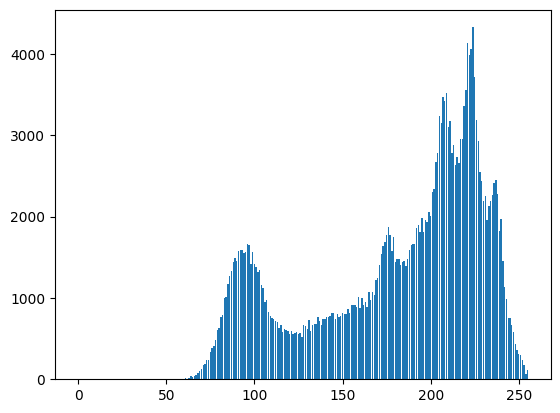

In [5]:
hist = cv2.calcHist([img], [0], None, [256], [0,256]) 
plt.bar(range(256), hist[:, 0])
plt.show()

## 調整對比度 / 明亮度
語法：cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

(([], []), ([], []))

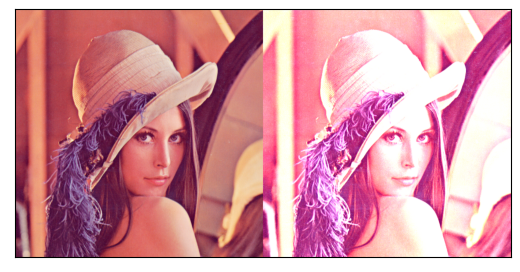

In [3]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_abs = cv2.convertScaleAbs(img, alpha=2.0, beta=0)    # alpha:控制對比度 (1.0~3.0), beta:控制明亮度 (0~255)
img_group = np.hstack((img, img_abs))
plt.imshow(img_group)
plt.xticks([]), plt.yticks([])

## 二值化 Binarization
二值化是最簡單的圖像分割，僅能作用於灰階圖片。原理為設定一個臨界值，將圖片分為純粹的黑白兩塊，依照臨界值設計的不同可用分為固定閾值與自適應閾值。語法：ret, dst = cv2.threshold(src, thresh, maxval, type)
- cv2.THRESH_BINARY：超過門檻值的像素設為最大值，小於的設為0
- cv2.THRESH_BINARY_INV：超過門檻值的像素設為0，小於的設為最大值
- cv2.THRESH_OTSU：自動計算門檻值來做二值化，可配合其他方法使用(只接受單一通道的色彩空間)

In [ ]:
# 法1
img = cv2.imread('cat.jpeg')
th, img_binarized = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
img_group = np.hstack((img, img_binarized))
cv2_imshow(img_group)

In [ ]:
img = cv2.imread('cat.jpeg')
img2 = img.copy()
th1, img2[:,:,0] = cv2.threshold(img[:,:,0], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
th2, img2[:,:,1] = cv2.threshold(img[:,:,1], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
th3, img2[:,:,2] = cv2.threshold(img[:,:,2], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th1, th2, th3)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

adaptiveThreshold 會自動計算門檻值，跟 threshold 的 THRESH_OTSU 方法不同在於將整張圖像分成數個小區塊分別去計算(只接受單一通道的色彩空間)
- cv2.ADAPTIVE_THRESH_MEAN_C: 計算區塊大小內的平均值再減去微調值
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 計算區塊大小內的高斯加權平均值值再減去微調值

In [ ]:
# 法2
img = cv2.imread('cat.jpeg')
img2 = img.copy()
img2[:,:,0] = cv2.adaptiveThreshold(img[:,:,0], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img2[:,:,1] = cv2.adaptiveThreshold(img[:,:,1], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img2[:,:,2] = cv2.adaptiveThreshold(img[:,:,2], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 5)
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

## Transformation
Affine transformation, Perspective transformation 都是一種 Transformation，各種變換其實都可以將形式變成：圖片上的點用齊次座標表示後，再乘上一個 transformation matrix，從而對圖片上的點進行變換。Transformation Matrix(轉換矩陣)如下：
<img src=img/轉換矩陣.png width=60%>

齊次座標 Homogeneous coordinate：模擬人類視野，藉由增加一個維度，來解決透視問題。後面介紹的鏡射、平移、旋轉都不會改變透視，所以齊次座標第三維的值都為 1

### (1) 仿射變換 Affine Transformation
仿射變換是線性變換後再做平移的結果，具有共線不變、比例不變的特性，可用於資料擴增、匹配處理
- 鏡射變換 Reflection Transformation
- 旋轉變換 Rotation Transformation
- 水平與垂直翻轉 Flip
- 平移

語法：cv2.warpAffine(src, M, dsize, flags, borderValue)
- src：輸入圖片
- M：Transformation Matrix
- dsize：輸出圖像大小，為一個 Tuple (長，寬)
- flags：若圖片需要縮放的插值類型
- borderValue：若圖片小於原本邊界，欲填充的顏色

計算 Transformation Matrix：M = cv2.getAffineTransform(pos1, pos2)
- pos1：為變換前的三個點座標
- pos2：為變換後的三個點座標

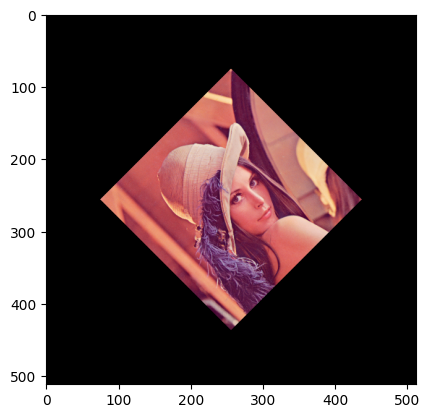

In [6]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5) #取得旋轉矩陣, getRotationMatrix2D(center, angle, scale)
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))
plt.imshow(img_rotate)

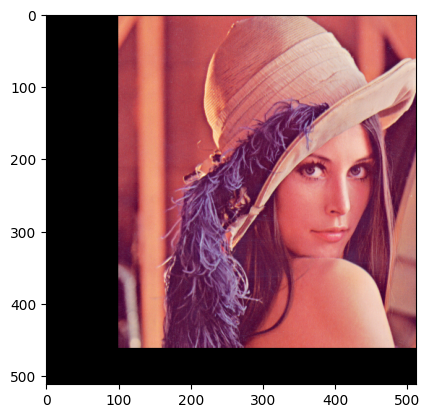

In [7]:
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)  # 取得平移矩陣
img_rotate_trans = cv2.warpAffine(img, M_translate, (cols, rows))
plt.imshow(img_rotate_trans)

In [ ]:
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)
M_affine = cv2.getAffineTransform(pt1, pt2)      # 取得 affine 矩陣
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

### (2) 透視變換 Perspective Transformation
透視變換可以視為改變視角的轉換，因此不像仿射變換，已經不保證共線不變性和比例不變性

語法：cv2.warpPerspective(src, M, dsize, flags, borderValue)
- src：輸入圖片
- M：Transformation Matrix
- dsize：輸出圖像大小，為一個 Tuple (長，寬)
- flags：若圖片需要縮放的插值類型
- borderValue：若圖片小於原本邊界，欲填充的顏色

計算 Transformation Matrix：M = cv2.getPerspetiveTransform(pos1, pos2)
- pos1：為變換前的四個點座標
- pos2：為變換後的四個點座標

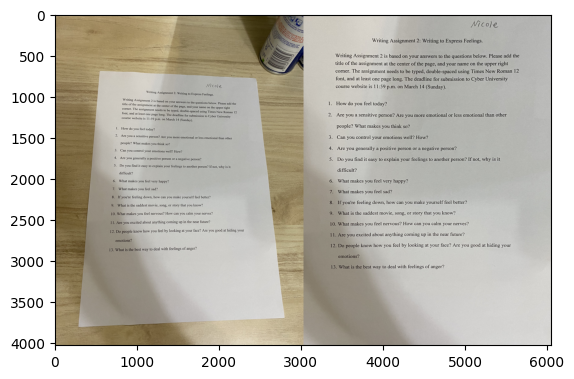

In [8]:
img_path = 'img/paper.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #保存圖片時記得註釋此行代碼
h, w = img.shape[:2]
pt1 = np.array([[600, 750], [2400, 830], [2800, 3700], [300, 3800]], dtype=np.float32)
pt2 = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)
M = cv2.getPerspectiveTransform(pt1, pt2)      # 取得 perspective 矩陣
img_perspective = cv2.warpPerspective(img, M, (w, h))    # perspective 轉換
img_group = np.hstack((img, img_perspective))
plt.imshow(img_group)
# cv2.imwrite('output.jpg', img_perspective)

## Filter 特徵提取
Filter 又稱為 kernel，概念上是一個固定大小的矩陣，掃過圖片經過計算後取得新的圖片矩陣，此過程稱為特徵提取。根據 Filter 中設定的係數不同，會有不同的結果，例如模糊 Gaussian Blur、邊緣偵測 Sobel 等。在圖片世界中，分為高通濾波器(阻擋低頻訊號，使高頻訊號通過)、低通濾波器(阻擋高頻訊號，使低頻訊號通過)，高頻代表單位距離內像素值變化大的部分(例如邊緣或雜訊)，低頻代表單位距離內像素值變化小的部分(例如去背)。因此，我們會將具模糊效果的濾波器(濾除邊緣及雜訊)統稱為低通濾波器，具鋭化效果的濾波器統稱為高通濾波器。

語法：dst = cv2.filter2D(src, ddepth, kernel, anchor, detal)
- src：作用圖像
- ddepth：目標圖像所需深度(-1：與目標圖像相同)
- kernel：自定義 filter
- anchor：filter 的錨點，預設為正中心
- detal：filter 過後添加的常數

### (1) 模糊 Gaussian Blur
影像模糊從另一個觀點解釋可以說是邊緣不明顯，而邊緣的物理意義可以簡單代表兩側的顏色差別大，所以我們可以把模糊想像成是要讓顏色的差異變小。而模糊的最大用途是去噪(美肌)，市面上諸如美圖秀秀都是設計良好的模糊濾波器，用途為修飾皮膚瑕疵
- Averaging Blur：最簡單的概念，把周圍的 pixel 全部平均
- Gaussian Blur：根據高斯分佈產生不同的 Gaussian filter，而mean 和 variance 是其兩大參數
- Non-local means blur：近期提出的新型模糊方式，在模糊的同時儘可能保護圖像原始的細節特徵，中心思想是將具有類似結構的像素加權平均

語法：img_blur = cv2.GaussianBlur(img, (3, 3), 0)

In [10]:
# 法1，自定義 filter
average_filter = np.ones((3, 3)) / 9
img_average = cv2.filter2D(img, -1, average_filter)

# 法2-1，呼叫內建函數。高斯模糊
img_gaussian_blur = cv2.GaussianBlur(img, (3, 3), 0)

# 法2-2，呼叫內建函數。平均值模糊法(統計範圍內的色彩值平均)
img_mean_blur = cv2.blur(img, (3, 3))           # Tuple 類型: (寬, 高)

# 法2-3，呼叫內建函數。中值模糊法(將處理範圍內的色彩值做排序，取順序在中間的)
img_median_blur = cv2.medianBlur(img, 15)    # 純數值，必須是單數

img_group = np.hstack((img, img_mean_blur, img_median_blur, img_gaussian_blur))
cv2_imshow(img_group)

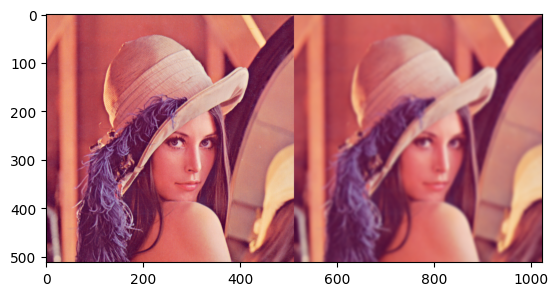

In [11]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blur = img.copy()
# 覺得模糊效果不足，可以對同一張圖片多做幾次或調整 filter size 決定模糊範圍大小
# img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
# img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
# img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.blur(img_blur, (5, 5))
img_blur = cv2.blur(img_blur, (5, 5))
img_blur = cv2.blur(img_blur, (5, 5))
img_group = np.hstack((img, img_blur))
plt.imshow(img_group)

### (2) 邊緣檢測 - Sobel
邊緣的特性是兩側的顏色差別很大，而一張圖片的邊緣越清晰，銳度則越高。故可以透過得到圖片的邊緣並疊加至原本的圖片上，以加強邊緣清晰度，而得到圖片的邊緣即為邊緣檢測。跟模糊不一樣的地方是邊緣檢測是要加強邊緣特性，通常會用灰階圖來做邊緣檢測，基本的邊緣檢測：Sobel filter。
Sobel 演算法：
- a.先得到垂直和水平的邊緣。尋找邊緣正確的說法是計算圖片的導數 derivatives，可以透過 Sobel 個別拿到 x 和 y 方向的邊緣
- b.再將兩者做結合。0-255之外的值要做處理，因為做完 Sobel 後可能會有負數，需將負值變為 0，大於 255 的值變為 255

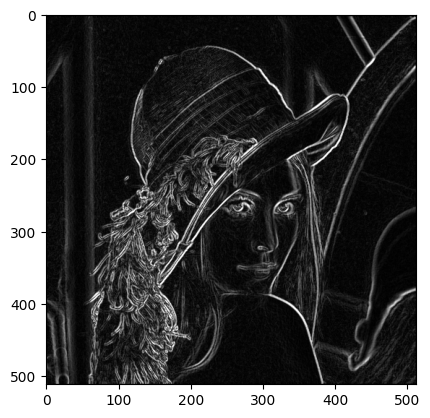

In [9]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)
# img_x = np.where(img_x < 0, 0, img_x)      
# img_x = np.where(img_x > 255, 255,img_x)
img_y = cv2.Sobel(img_gray, cv2.CV_16S, dx=0, dy=1, ksize=3)
# img_y = np.where(img_y < 0, 0, img_y)
# img_y = np.where(img_y > 255, 255,img_y)
abs_x = cv2.convertScaleAbs(img_x)
abs_y = cv2.convertScaleAbs(img_y)
img_sobel = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
plt.imshow(img_sobel, cmap='gray')

In [ ]:
# 也可以使用 filter2D 來實現
filter_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filter_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
img_x = cv2.filter2D(img_gray, -1, filter_x)
img_y = cv2.filter2D(img_gray, -1, filter_y)
abs_x = cv2.convertScaleAbs(img_x)
abs_y = cv2.convertScaleAbs(img_y)
img_ = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
plt.imshow(img_, cmap='gray')

### (3) 邊緣檢測(進階) - Canny
Canny 在雜訊處理和邊緣定位都有相當好的表現，Non-maximum suppression 和雙門檻值過濾，是該演算法最大的特色，可以有效獲得正確的邊界，後續影像專題會使用該演算法。演算法過程：灰階化 ——> 高斯模糊 ——> Sobel 尋找水平及垂直梯度 ——> 求得梯度強度 G 及梯度方向 ——> Non-maximum suppression ——> 獲得梯度篩選結果 ——> 雙門檻值過濾

In [ ]:
img = cv2.imread('cat.jpeg')
img_canny = cv2.Canny(img, 250, 300)       # 先用大的門檻值檢測邊緣，再用小的門檻值將檢測出來的結果線條連起來
cv2_imshow(img_canny)

### (4) 銳利化
直方圖均衡 Histogram Equalization\
實際攝影時，常因環境因素造成過曝或曝光不足，造成細節損失，這樣的圖片輸入AI模型，往往會造成準確率低下，而直方圖均衡透過平衡直方圖，可可以恢復圖片該有的細節。語法：cv2.equalizeHist(img)。另外還有限制對比度自適應直方圖均衡化 CLAHE，

(([], []), ([], []))

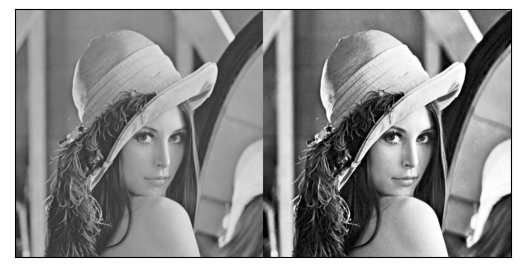

In [2]:
img_path = 'img/lena.png'
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_gray_equal = cv2.equalizeHist(img_gray)      # 灰階圖片直方圖均衡
img_group = np.hstack((img_gray, img_gray_equal))
plt.imshow(img_group, cmap='gray')
plt.xticks([]), plt.yticks([])

In [ ]:
# 直方圖均衡化法，只接受單一通道色彩空間
img = cv2.imread('cat.jpeg')
img2 = img.copy()
img2[:,:,0] = cv2.equalizeHist(img2[:,:,0])
img2[:,:,1] = cv2.equalizeHist(img2[:,:,1])
img2[:,:,2] = cv2.equalizeHist(img2[:,:,2])
img_group = np.hstack((img, img2))
cv2_imshow(img_group)

## SIFT
- 尺度不變性
- 尺度空間極值偵測：SIFT 會基於邊緣檢測抽取特徵，但不是使用前面提到的 Sobel
    - LoG：先對圖片做 Gaussian Blur，再算二階導數取得邊緣
    - DoG：圖片經過不同程度的縮放後，計算出不同程度的 Gaussian Blur，最後合併得到一個 Gaussian Pyramid，其差值即為 DoG，結果視為 LoG 的約略值(沒有做二階導數)
- 極值偵測：針對每個 pixel 判斷是否為極值，假如該 pixel 為判斷範圍內的最大/最小值，則將其設為有興趣的關鍵點
- 關鍵點定位：經過多尺度極值偵測後，會得到很多候選的關鍵點，其中也包含很多噪音和邊緣關鍵點，需要進一步根據周遭資訊來修正並過濾關鍵點
- 方位定向：前面定義並過濾了很多關鍵點，但是關鍵點只有包含尺度跟位置。SIFT 還想要保有旋轉不變性，因此要給關鍵點定義一個方向
- 關鍵點描述子：賦予關鍵點位置，尺度，方向確保移動、縮放、旋轉的不變性，還需要額外建立描述子來確保不同光線跟視角也有不變性

In [ ]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()     #建立SIFT物件
keypoints = sift.detect(img_gray, None)  #抽取關鍵點
img_show = cv2.drawKeypoints(img_gray, keypoints, img)
plt.imshow(img_show, cmap='gray')

SIFT只是眾多特徵抽取方式中的其中一種，當我們取得特徵之後，就代表我們有能力去識別關鍵點的特殊性，後面就可以丟到分類器裡面做分類。可應用在：\
**(1) 配對：判斷兩張圖片上相同物體的位置**
- 首先配對會有兩張圖片，其中一張是 query image，我們會各自在兩張上面抽取 SIFT  特徵。
- 配對會從兩張圖片中的關鍵點中，透過計算其特徵空間上的距離，若小於一個設定的閾值則視為相同的特徵，在SIFT 特徵的配對任務中，通常會使用 L2 norm 的方式計算，兩個 128 維向量根據公式計算得到一個距離。
- 簡單暴力的配對方法是逐一針對 query image 的關鍵點，對每個 train image 的關鍵點計算 L2 距離，取得距離最小的配對，或取得 k 個最適合的配對再根據距離過濾不適合的配對。
- 我們可以尋找 k=2 個最好的配對方式，透過 ratio test 的方式過濾一些不適當的配對，因為有時候 query 的關鍵點不會出現在 train image，建議 ratio test 設定在 0.7～0.8 比較好

**(2) 辨識：判斷兩張圖片上是否有相同物體\
(3) 全景圖：尋找兩張圖片的相同視角，再經過轉換合成全景圖**

In [ ]:
img_query = cv2.imread('img/box.png', 0)
img_train = cv2.imread('img/box_in_scene.png', 0)
sift = cv2.xfeatures2d.SIFT_create()    # 建立 SIFT 物件
kp_query, des_query = sift.detectAndCompute(img_query, None)  # 取得關鍵點同時也計算 128 維敘述子向量
kp_train, des_train = sift.detectAndCompute(img_train, None)
bf = cv2.BFMatcher(cv2.NORM_L2)      # 建立 Brute-Force Matching 物件，使用 L2 norm 計算距離
matches = bf.knnMatch(des_query, des_train, k=2)   # 以 knn 方式暴力比對特徵
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:    # 透過 D.Lowe ratio test 排除不適合的配對，ratio test 設定比值為 0.75
        candidate.append([m])
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)  # 顯示配對結果
plt.imshow(img_show, cmap='gray')

## OpenCV 繪圖
是直接畫在圖片上面，而不是回傳一個畫好圖的圖片。除多邊形以外其他圖形的座標點都只能是 Tuple 類型，表示為 (x, y)。顏色參數依照色彩空間的不同可傳入陣列或單一數值

In [ ]:
# 建立一張圖片，在上面畫直線、矩形、圓形
img = np.full((400,500,3), (100,199,250), np.uint8)

# 畫矩形。分別為：圖片、左上角座標、右上角座標、BGR 顏色、線粗細 (-1 代表填滿)
cv2.rectangle(img, (60, 40), (420, 510), (0, 0, 255), 3)

# 畫圓形。分別為：圖片、中心點、半徑、BGR 顏色、線粗細 (-1 代表填滿)
cv2.circle(img, (100, 100), 50, (0, 0, 255), -1)

# 畫直線。分別為：圖片、線的起點、線的終點、BGR 顏色、線粗細
cv2.line(img, (60, 40), (420, 510), (0, 0, 255), 3)

# 寫字，法1。分別為：圖片，文字，左下角座標，字型，字體大小，字體顏色，字體粗細
cv2.putText(img, 'text', (60, 40), 0, 3, (0, 0, 255), 2)

# 寫字，法2。用 PIL 在圖片上寫字
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow
img = Image.fromarray(img)
ImageDraw.Draw(img).text((100, 200), '哈哈', (255, 0, 0), ImageFont.truetype('kaiu.ttf', 50))
img = np.array(img)
cv2_imshow(img)

In [ ]:
img_path = 'img/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(800, 800))
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
pred = model.predict(img)
print('辨識結果為：', np.argmax(pred))